# Predicting Income From Census Information

In this lesson, we will build a machine learning model on some real data.

We will solve the following problem:

Based on a person's demographic information, can you predict whether they make more or less than 50K a year?

We will use this dataset: https://archive.ics.uci.edu/ml/datasets/Census+Income

It contains information like a person's age, country, education, and more.

# Download the Data

The website provides TWO sets of data. The first, called `adult.data` is what we will use as our training and validation sets.

The second, called `adult.test` is what we will use to evaluate the performance of our machine learning model.


**Exercise 1: Why can we NOT `adult.test` as training data in addition to evaluation data?**

In [16]:
import requests

def fetch_data(url, filepath):
    r = requests.get(url)
    with open(filepath, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=128):
            fd.write(chunk)

# Download adult.data and adult.test into into /tmp.
adult_data_path = '/tmp/adult.data'
fetch_data(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    adult_data_path,
)

adult_test_path = '/tmp/adult.test'
fetch_data(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
    adult_test_path,
)

# Read the Data

We will read the data using a Python library called Pandas, which can be used to manipulate CSV data
and also interoperates very nicely other Python libraries like numpy (numeric computation), scipy (scientific computation), scikit-learn (machine learning), matplotlib (plotting/visualization).

Basically, we read the CSV into a tabular data structure called a **DataFrame**.

In [112]:
import pandas as pd
import numpy as np

"""
Taken from https://archive.ics.uci.edu/ml/datasets/Census+Income

age: continuous. 
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
fnlwgt: continuous. 
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
education-num: continuous. 
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
sex: Female, Male. 
capital-gain: continuous. 
capital-loss: continuous. 
hours-per-week: continuous. 
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

label_raw: >50K, <=50K. 
"""
col_names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'native_country',
    'label',
]


adult_data_raw = pd.read_csv(adult_data_path, header=None, names=col_names)
adult_test_raw = pd.read_csv(adult_test_path, header=None, names=col_names)

adult_data_raw

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Preprocess the Data

Like all datasets, the census dataset needs some preprocessing to clean it.

In [199]:
def preprocess(df_raw):
    # We re-write the label column so that it is 1 if the person makes > 50K and 0 if they
    # make <= 50K.
    LABEL_POSITIVE = ' >50K'
    df = df_raw.copy()
    df.label = np.where(df.label == LABEL_POSITIVE, 1, 0)
    
    # Let's get rid of the fnlwgt column because it is meaningless.
    df = df.drop('fnlwgt', 1)
    return df

adult_data = preprocess(adult_data_raw)
adult_test = preprocess(adult_test_raw)

adult_data

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


# Explore the Data

Before doing any machine learning, let's compute some basic statistics and visualizations from
the dataset.

After running the two cells below, here are some observations that we can make:

1. There are roughly 3x as many people who make <= 50K than > 50K
2. Almost all the people in the dataset are from the United States
3. People who work more hours per week tend to make more money
4. White people tend to make more money than black people


**
Exercise 2: Run the two cells below and make 4-5 more observations like the ones above.
**

In [200]:
"""
Let's start by counting the number of examples (overall, positive, and negative)
and number of features.
"""

(num_examples, num_features) = adult_data.shape
(num_positive_examples, _) = (adult_data[adult_data.label == 1]).shape
(num_negative_examples, _) = (adult_data[adult_data.label == 0]).shape
print(
    """
    Number of Examples: {}
    Number of Features: {}
    Number of Positive Examples: {}
    Number of Negative Examples: {}
    """.format(
        num_examples,
        num_features - 1, # The label is not a feature so subtract if off.
        num_positive_examples,
        num_negative_examples,
    )
)


    Number of Examples: 32561
    Number of Features: 13
    Number of Positive Examples: 7841
    Number of Negative Examples: 24720
    


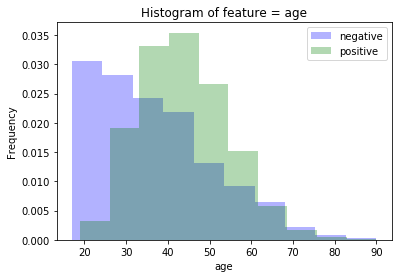

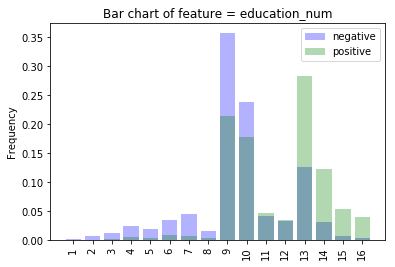

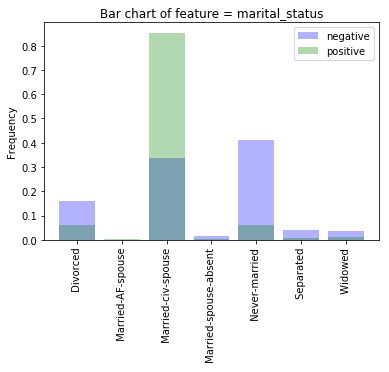

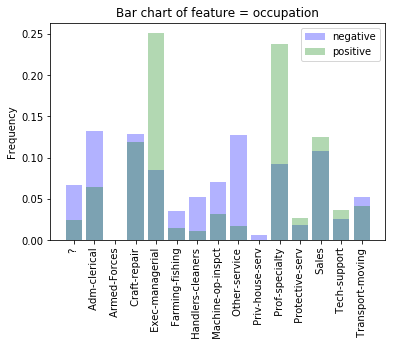

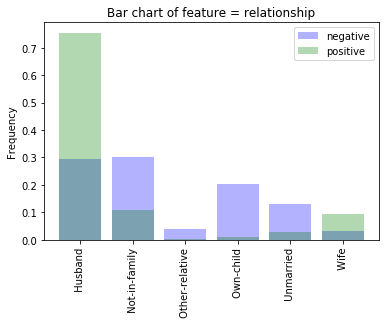

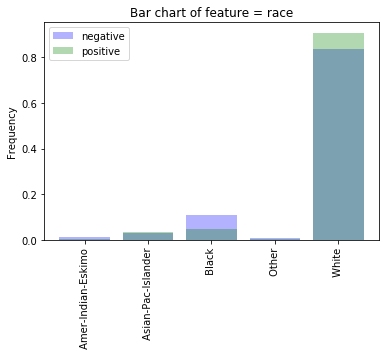

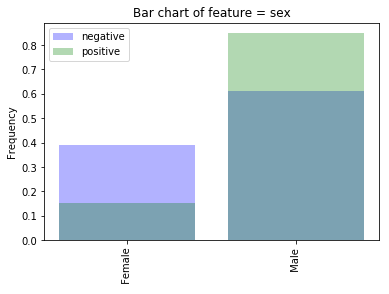

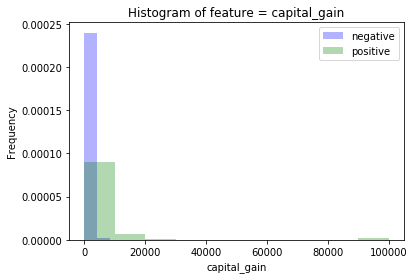

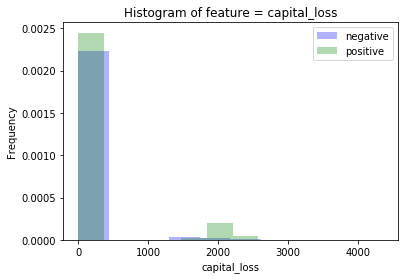

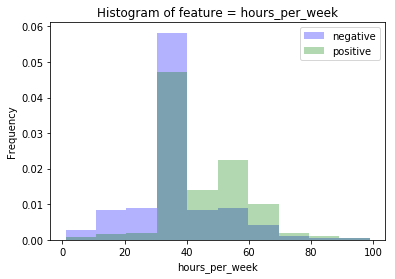

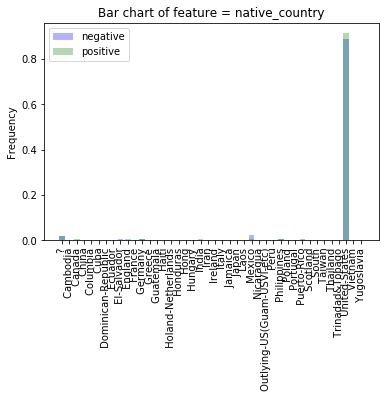

In [201]:
"""
Let's make some bar charts and histograms to see how different features
are related to the label.
"""
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

def histograms(df, feature_name):
    colors = ['blue', 'green']
    labels = ['negative', 'positive']
    for i in (0, 1):
        values = df[df.label == i][feature_name]
        plt.hist(values, normed=1, facecolor=colors[i], alpha=0.3, label=labels[i])
    
    plt.legend(prop={'size': 10})

    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.title('Histogram of feature = {}'.format(feature_name))
    plt.show()

def bar_charts(df, feature_name):
    colors = ['blue', 'green']
    labels = ['negative', 'positive']
    objects = sorted(df[feature_name].unique())
    for i in (0, 1):
        sub_df = df[df.label == i]
        N = sub_df.shape[0]
        values = sub_df.groupby([feature_name])[feature_name].count() / N
        values_as_dict = {k: v for (k, v) in values.items()}
        frequencies = [values_as_dict.get(k, 0) for k in objects]
        y_pos = np.arange(len(objects))
        plt.bar(y_pos, frequencies, facecolor=colors[i], align='center', alpha=0.3, label=labels[i])
        plt.xticks(y_pos, objects, rotation=90)
    plt.legend(prop={'size': 10})
    plt.ylabel('Frequency')
    plt.title('Bar chart of feature = {}'.format(feature_name))
    plt.show()
histograms(adult_data, 'age')
bar_charts(adult_data, 'education_num')
bar_charts(adult_data, 'marital_status')
bar_charts(adult_data, 'occupation')
bar_charts(adult_data, 'relationship')
bar_charts(adult_data, 'race')
bar_charts(adult_data, 'sex')
histograms(adult_data, 'capital_gain')
histograms(adult_data, 'capital_loss')
histograms(adult_data, 'hours_per_week')
bar_charts(adult_data, 'native_country')

# Prepare the Data for Machine Learning

Now that we've visualized the data, we want to feed it into a machine learning model.

However, recall that supervised machine learning models take the form ($\mathbf{x} \in \mathbb{R}^d$):

$$
f(\mathbf{x}) = y
$$

Where $y \in \{0, 1, ..., K\}$ for multi-classification ($K = 2$ is binary classification) and $y \in \mathbb{R}$ for regression.

**Exercise 3: What kind of problem are we solving here: Classification (in which case, what is $K$?) or regression?**

In order to do machine learning, we need a design matrix. That is, we need to turn our data into a matrix $X \in \mathbb{R}^{m \times d}$ where $m$ is the number of training examples and $d$ is the dimensionality of the feature vector.

The challenge, however, is that many of our feature values are not numbers. For example, one occupation in our dataset is called 'Tech-support', which is clearly not a number.

For continuous features, like  age and capital gain, this is trivial because they are already numbers.

For categorical features, like occupation and race, this is harder. Let's see how we can turn a categorical feature into a number.

## String Indexing and One-Hot-Encoding
